In [2]:
using Distributions
using Gadfly

<br>

<br>

_________________

# 4.

__In a random sample of 545 citizens, 117 of them supported the construction of a casino in the middle of river Tejo.__

__ a) Test, with a level of 5%, the hypothesis that at least 25% of all the citizens support the construction.__

<br>

Variables:

In [4]:
X_4a = 117; n_4a = 545; α_4a = 0.05; p_hat_4a = X_4a/n_4a;

In [17]:
p_hat_4a

0.21467889908256882

Hypothesis:

$$ H_0 : p \geq 25\% $$

$$ H_1 : p < 25\% $$

Statistics of the test:

$$ Z = \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} \ \dot{\cap} \ N_{(0,1)}$$ 

In [5]:
Z_4a = (p_hat_4a-.25)/sqrt(.25*(1-.25)/n_4a)

-1.9042845622935665

Get the _p-value_:

In [6]:
p_value_4a = cdf(Normal(0,1), Z_4a) 

0.028436566839810575

Find the upper bound:
$$ Z_\alpha$$

In [8]:
L_4a = quantile(Normal(0,1), α_4a)

-1.6448536269514729

Let us plot $N_{(0,1)}$ with the upper boundary and the $Z$ calculated:

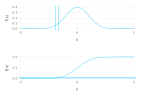

In [14]:
pdf_4a = plot([x -> pdf(Normal(0,1), x)], -5, 5, Geom.vline, xintercept=[L_4a, Z_4a])
cdf_4a = plot([x -> cdf(Normal(0,1), x)], -5, 5, Geom.hline, yintercept=[α_4a, p_value_4a])
vstack(pdf_4a, cdf_4a)

_Decision rule:_ Reject $ H_O $ if $Z < L$.

In [16]:
Z_4a < L_4a

true

_Conclusion:_ We should reject the null hypothesis.

<br>

__b) What is the probability of rejecting the null hypothesis using the decision rule adopted in question a) if the true percentage of citizens who support the construction is:__

_Decision rule:_ Reject $ H_O $ if $Z < L$. Obviously, the L will stay the same for the present $\alpha$.

In [18]:
function z_per_p(p)
    return (p_hat_4a-p)/sqrt(p*(1-p)/n_4a)
end

z_per_p (generic function with 1 method)

__i. 20%;__

<br>

In [19]:
Z_4bi = z_per_p(.2)

0.8567058737562387

In [20]:
Z_4bi < L_4a

false

<br>

__ii. 25%;__

In [21]:
Z_4bii = z_per_p(.25)

-1.9042845622935665

In [22]:
Z_4bii < L_4a

true

<br>

__iii. 30%;__

In [23]:
Z_4biii = z_per_p(.3)

-4.346553748529949

In [24]:
Z_4biii < L_4a

true

<br>

<br>

______________________

# 10.

__The market price of a certain product is subject to large fluctuations around a certain value long term value. __

__There are reasons to assume that this price can be perceived as a random variable that approximately follows a Normal distribution with the variance equal to 9. __

__If the variance is larger, the market situation tends to become chaotic. Periodically, price observations are collected to evaluate the functioning of the market in what concerns this characteristic.__

__a) Based on 16 price observations, a sample variance equal to 10 was obtained. What do you conclude about the functioning of the market?__

<br>

Variables:

In [120]:
σ_10a = sqrt(9); n_10a = 16; s_10a = sqrt(10); α_10a = 0.05;

Hypothesis:

$$ H_0 : \sigma^2 = 9 $$

$$ H_1 : \sigma^2 > 9 $$

Statistics of the test:

$$ \chi^2 = \frac{(n-1)s'^2}{\sigma^2} \cap \chi^2_{n-1}$$ 

In [121]:
χ_2_10a = ((n_10a-1)s_10a^2)/σ_10a^2

16.66666666666667

Get the _p-value_:

In [124]:
p_value_10a = 1 - cdf(Chisq(n_10a-1), χ_2_10a) 

0.3391783759553527

Find the lower bound:
$$ \chi^2_{n-1,\alpha}$$

In [122]:
L_L_10a = cquantile(Chisq(n_10a-1), α_10a)

24.995790139728626

Let us plot $\chi^2_{15}$ with the lower boundary and the $\chi'^2$ calculated:

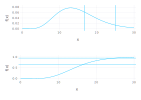

In [127]:
pdf_10a = plot([x -> pdf(Chisq(n_10a-1), x)], 0, 30, Geom.vline, xintercept=[L_L_10a, χ_2_10a])
cdf_10a = plot([x -> cdf(Chisq(n_10a-1), x)], 0, 30, Geom.hline, yintercept=[1-α_10a, 1-p_value_10a])
vstack(pdf_10a, cdf_10a)

_Decision rule:_ Reject $ H_O $ if $\chi^2 > L_L$.

In [128]:
χ_2_10a > L_L_10a

false

_Conclusion:_ we do not reject the null hypothesis that the variance of the population is 9.

<br>

__b) Changes regarding the functioning of the market were introduced in order to reduce the fluctuations (that is, the variability) of the prices observed previously. Suppose that after some period of time, 13 price observations were collected, resulting in $s'^2 = 9$. Is it reasonable to conclude that the adopted measures were efficient?__

<br>

Variables:

In [132]:
n_1_10b = 16; s_1_10b = sqrt(10); 
n_2_10b = 13; s_2_10b = sqrt(9); 
α_10b = 0.1;

Hypothesis:

$$ H_0 : \frac{\sigma^2_1}{\sigma^2_2} = 1 $$

$$ H_1 : \frac{\sigma^2_1}{\sigma^2_2} \neq 1 $$

Statistics of the test:

$$ F = \frac{\frac{s'^2_1}{\sigma^2_1}}{\frac{s'^2_2}{\sigma^2_2}} \cap F_{(n_1-1, n_2-1)}$$ 

In [133]:
F_10b = s_1_10b^2/s_2_10b^2

1.1111111111111114

Get the _p-value_:

In [136]:
p_value_10b = 1 - cdf(FDist(n_1_10b-1, n_2_10b-1), F_10b) 

0.4333236371844573

Find the right bound:
$$ F_{(n_1-1, n_2-1) \frac{\alpha}{2}}$$

In [138]:
L_R_10b = cquantile(FDist(n_1_10b-1, n_2_10b-1), α_10b/2)

2.616851234132112

Find the left bound:
$$ F_{(n_1-1, n_2-1) 1-\frac{\alpha}{2}}$$

In [139]:
L_L_10b = cquantile(FDist(n_1_10b-1, n_2_10b-1), 1 - α_10b/2)

0.4039893180036247

In [146]:
1 / cquantile(FDist(n_2_10b-1, n_1_10b-1), α_10b/2)

0.4039893180036246

Let us plot $F_{(15,12)}$ with the boundaries and the $F$ calculated:

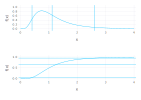

In [143]:
pdf_10 = plot([x -> pdf(FDist(n_1_10b-1, n_2_10b-1), x)], 0, 4, Geom.vline, xintercept=[L_L_10b, L_R_10b, F_10b])
cdf_10 = plot([x -> cdf(FDist(n_1_10b-1, n_2_10b-1), x)], 0, 4, Geom.hline, yintercept=[α_10b/2, 1-α_10b/2, 1-p_value_10])
vstack(pdf_10, cdf_10)

_Decision rule:_ Reject $ H_O $ if $F < L_L \vee F > L_R$.

In [144]:
(F_10b < L_L_10b) | (F_10b > L_R_10b)

false

_Conclusion:_ we do not reject the null hypothesis that the variance kept the same.

<br>

<br>

__________

# 11.

__ A test of Economics, graded from 0 to 100, is done by $n_1=50$ girls and $n_2=75$ boys. The girls obtained an average score of 76 with standard deviation of 6, while the boys obtained an average score of 82 with the standard deviation of 8. We are referring to empirical values. __

__a) Test the hypothesis that the mean (expected values!!) scores do not differ between boys and girls.__

<br>

Variables:

In [85]:
n_1_11a = 50; x_1_11a = 76; s_1_11a = 6;
n_2_11a = 75; x_2_11a = 82; s_2_11a = 8;
α_11a = 0.05;

Hypothesis:

$$ H_0 : \mu_2-\mu_1 = 0 $$

$$ H_1 : \mu_2-\mu_1 \neq 0 $$

Statistics of the test:

$$ Z = \frac{(\bar{x}_2-\bar{x}_1)-(\mu_2-\mu_1)}{\sqrt{\frac{s'^2_2}{n_2}+\frac{s'^2_1}{n_1}}} \ \dot{\cap} \ N(0,1)$$ 

In [87]:
Z_11a = (x_2_11a-x_1_11a)/(s_2_11a^2/n_2_11a+s_1_11a^2/n_1_11a)^(1/2)

4.783446031074606

Find the left bound:
$$ Z_{\frac{\alpha}{2}}$$

In [94]:
L_L_11a = quantile(Normal(0,1), α_11a/2)

-1.9599639845400592

Find the right bound:
$$ Z_{1-\frac{\alpha}{2}}$$

In [95]:
L_R_11a = quantile(Normal(0,1), 1 - α_11a/2)

1.9599639845400583

Get the _p-value_:

In [98]:
p_value_16 = cdf(Normal(0,1), -Z_11a) + (1 - cdf(Normal(0,1), Z_11a))

1.7231517286651816e-6

Let us plot $N(0,1)$ with the boundaries and the Z calculated:

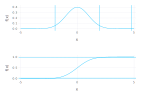

In [106]:
pdf_16 = plot([x -> pdf(Normal(0,1), x)], -5, 5, Geom.vline, xintercept=[L_L_11a, L_R_11a, Z_11a])
cdf_16 = plot([x -> cdf(Normal(0,1), x)], -5, 5, Geom.hline, yintercept=[α_11a/2, 1-α_11a/2])
vstack(pdf_16, cdf_16)

_Decision rule:_ Reject $ H_O $ if $Z < L_L \vee Z > L_R$.

In [102]:
(Z_11a < L_L_11a) | (Z_11a > L_R_11a)

true

_Conclusion:_ We should reject the null hypothesis.

<br>

__b) Imagine now that for the same story you have the following information: __

In [105]:
n_1_11b = 7; x_1_11b = 76; s_1_11b = 10;
n_2_11b = 8; x_2_11b = 82; s_2_11b = 11;
α_11b = 0.05;

<br>

Hypothesis:

$$ H_0 : \mu_2-\mu_1 = 0 $$

$$ H_1 : \mu_2-\mu_1 \neq 0 $$

Statistics of the test: (we have to assume that $\sigma_1 = \sigma_2$)

$$ t = \frac{(\bar{x}_2-\bar{x}_1)-(\mu_2-\mu_1)}{\sqrt{\frac{s'^2_2}{n_2}+\frac{s'^2_1}{n_1}}} \ \cap \ t_{(n_2 + n_1 - 2)}$$ 

In [107]:
t_11b = (x_2_11b-x_1_11b)/(s_2_11b^2/n_2_11b+s_1_11b^2/n_1_11b)^(1/2)

1.1063650915710395

Find the left bound:
$$ t_{\frac{\alpha}{2}}$$

In [108]:
L_L_11b = quantile(TDist(n_2_11b+n_1_11b-2), α_11b/2)

-2.160368656462792

Find the right bound:
$$ t_{1-\frac{\alpha}{2}}$$

In [112]:
L_R_11b = quantile(TDist(n_2_11b+n_1_11b-2), 1- α_11b/2)

2.1603686564627917

Get the _p-value_:

In [113]:
p_value_16 = cdf(TDist(n_2_11b+n_1_11b-2), -t_11b) + (1 - cdf(TDist(n_2_11b+n_1_11b-2), t_11b))

0.28862204859806107

Let us plot $t_{(n_2 + n_1 - 2)}$ with the boundaries and the $t$ calculated:

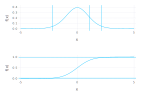

In [114]:
pdf_16 = plot([x -> pdf(TDist(n_2_11b+n_1_11b-2), x)], -5, 5, Geom.vline, xintercept=[L_L_11b, L_R_11b, t_11b])
cdf_16 = plot([x -> cdf(TDist(n_2_11b+n_1_11b-2), x)], -5, 5, Geom.hline, yintercept=[α_11b/2, 1-α_11b/2])
vstack(pdf_16, cdf_16)

_Decision rule:_ Reject $ H_O $ if $t < L_L \vee t > L_R$.

In [116]:
(t_11b < L_L_11a) | (t_11b > L_R_11a)

false

_Conclusion:_ We should not reject the null hypothesis.

<br>

<br>

__________

# 16.

__About the variance of a certain population through the historic information and solid statistical tests, it is believed that its value can be considered to be 100 (null hypothesis). 
__

__ It is also known that this value, in case it changed, has increased and not decreased. __

__ From a sample of 4 observations we got $ s'^2 = 112 $. __

<br>

Variables:

In [2]:
s_16 = sqrt(112); n_16 = 4; σ_16 = sqrt(100); α_16 = 0.05;

Hypothesis:

$$ H_0 : \sigma = 10 $$

$$ H_1 : \sigma > 10 $$

Statistics of the test:

$$ \chi^2 = \frac{(n-1)s'^2}{\sigma^2} \cap \chi^2_{n-1}$$ 

In [3]:
χ_2_16 = ((n_16-1)s_16^2)/σ_16^2

3.3600000000000008

Find the lower bound:
$$ \chi^2_{n-1,\alpha}$$

In [4]:
L_L_16 = cquantile(Chisq(n_16-1), α_16)

7.81472790325118

Get the _p-value_:

In [5]:
p_value_16 = 1 - cdf(Chisq(n_16-1), χ_2_16) 

0.33937868568570884

Let us plot $\chi^2_{3}$ with the lower boundary and the $\chi'^2$ calculated:

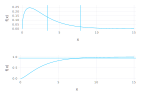

In [6]:
pdf_16 = plot([x -> pdf(Chisq(3), x)], 0, 15, Geom.vline, xintercept=[L_L_16, χ_2_16])
cdf_16 = plot([x -> cdf(Chisq(3), x)], 0, 15, Geom.hline, yintercept=[1-α_16])
vstack(pdf_16, cdf_16)

_Decision rule:_ Reject $ H_O $ if $\chi^2 > L_L$.

In [7]:
χ_2_16 > L_L_16

false

_Conclusion:_ we do not reject the null hypothesis that the variance of the population is 100.

<br>

__Suppose that the same value of $ s'^2$ has been obtained with samples of size 10, 16 and 40. Perform the respective tests and compare not only the statistics but also the p-values.__

<br>

Define the funtions:

In [8]:
function χ_2_per_n_16(n)
    value = ((n-1)s_16^2)/σ_16^2
    return value
end

χ_2_per_n_16 (generic function with 1 method)

In [9]:
function L_L_per_n_16(n)
    value = cquantile(Chisq(n-1), α_16)
    return value
end

L_L_per_n_16 (generic function with 1 method)

In [10]:
function p_value_per_n_16(n)
    value = 1 - cdf(Chisq(n-1), ((n-1)s_16^2)/σ_16^2)
    return value
end

p_value_per_n_16 (generic function with 1 method)

_______________

__n = 10__

In [11]:
χ_2_per_n_16(10), p_value_per_n_16(10), L_L_per_n_16(10)

(10.080000000000002,0.3440476850408407,16.918977604620448)

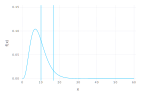

In [12]:
plot([x -> pdf(Chisq(9), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_16(10), χ_2_per_n_16(10)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 > L_L$.

In [13]:
χ_2_per_n_16(10) > L_L_per_n_16(10)

false

<br>

__n = 16__

In [14]:
χ_2_per_n_16(16), p_value_per_n_16(16), L_L_per_n_16(16)

(16.8,0.33096037225970854,24.995790139728626)

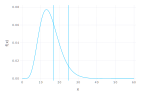

In [15]:
plot([x -> pdf(Chisq(15), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_16(16), χ_2_per_n_16(16)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 > L_L$.

In [16]:
χ_2_per_n_16(16) > L_L_per_n_16(16)

false

<br>

__n = 40__

In [17]:
χ_2_per_n_16(40), p_value_per_n_16(40), L_L_per_n_16(40)

(43.68000000000001,0.27929685828121253,54.57222775894173)

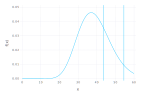

In [18]:
plot([x -> pdf(Chisq(39), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_16(40), χ_2_per_n_16(40)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 > L_L$.

In [19]:
χ_2_per_n_16(40) > L_L_per_n_16(40)

false

<br>

<br>

________

# 17.

__Repeat the exercise 16 considering now that the value, if changed, will be decreased and not increased. __

__Why would I do this? What is the purpose of this test if the sample value of the variance is higher than the value of the parameter of the null hypothesis?__

__Because the hypotheses are formulated before sampling!!! The hypotheses are formulated through historical knowledge, economic analysis, statistics thinking and common sense!!! The sampling comes after to confirm or not the usual suspects.__

<br>

Variables:

In [20]:
s_17 = sqrt(112); n_17 = 4; σ_17 = sqrt(100); α_17 = 0.05;

Hypothesis:

$$ H_0 : \sigma = 10 $$

$$ H_1 : \sigma \leq 10 $$

Statistics of the test:

$$ \chi^2 = \frac{(n-1)s'^2}{\sigma^2} \cap \chi^2_{n-1}$$ 

In [21]:
χ_2_17 = ((n_17-1)s_17^2)/σ_17^2

3.3600000000000008

Get the _p-value_:

In [23]:
p_value_17 = cdf(Chisq(n_17-1), χ_2_17) 

0.6606213143142912

Find the upper bound:
$$ \chi^2_{n-1,\alpha}$$

In [22]:
L_U_17 = cquantile(Chisq(n_17-1), 1-α_17)

0.35184631774927183

Let us plot $\chi^2_{3}$ with the lower boundary and the $\chi'^2$ calculated:

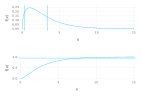

In [24]:
pdf_17 = plot([x -> pdf(Chisq(3), x)], 0, 15, Geom.vline, xintercept=[L_U_17, χ_2_17])
cdf_17 = plot([x -> cdf(Chisq(3), x)], 0, 15, Geom.hline, yintercept=[1-α_17])
vstack(pdf_17, cdf_17)

_Decision rule:_ Reject $ H_O $ if $\chi^2 < L_U$.

In [25]:
χ_2_17 < L_U_17

false

_Conclusion:_ we do not reject the null hypothesis that the variance of the population is 100.

<br>

__Suppose that the same value of $ s'^2$ has been obtained with samples of size 10, 16 and 40. Perform the respective tests and compare not only the statistics but also the p-values.__

<br>

Define the funtions:

In [28]:
function χ_2_per_n_17(n)
    value = ((n-1)s_17^2)/σ_17^2
    return value
end

χ_2_per_n_17 (generic function with 1 method)

In [29]:
function L_L_per_n_17(n)
    value = cquantile(Chisq(n-1), 1-α_17)
    return value
end

L_L_per_n_17 (generic function with 1 method)

In [30]:
function p_value_per_n_17(n)
    value = cdf(Chisq(n-1), ((n-1)s_17^2)/σ_17^2)
    return value
end

p_value_per_n_17 (generic function with 1 method)

_______________

__n = 10__

In [31]:
χ_2_per_n_17(10), p_value_per_n_17(10), L_L_per_n_17(10)

(10.080000000000002,0.6559523149591593,3.3251128430668166)

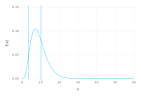

In [32]:
plot([x -> pdf(Chisq(9), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_17(10), χ_2_per_n_17(10)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 < L_L$.

In [34]:
χ_2_per_n_17(10) < L_L_per_n_17(10)

false

<br>

__n = 16__

In [14]:
χ_2_per_n_17(16), p_value_per_n_17(16), L_L_per_n_17(16)

(16.8,0.33096037225970854,24.995790139728626)

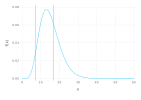

In [35]:
plot([x -> pdf(Chisq(15), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_17(16), χ_2_per_n_17(16)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 < L_U$.

In [38]:
χ_2_per_n_17(16) < L_L_per_n_17(16)

false

<br>

__n = 40__

In [40]:
χ_2_per_n_17(40), p_value_per_n_17(40), L_L_per_n_17(40)

(43.68000000000001,0.7207031417187875,25.69539039957478)

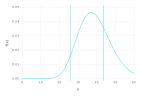

In [41]:
plot([x -> pdf(Chisq(39), x)], 0, 60, Geom.vline, xintercept=[L_L_per_n_17(40), χ_2_per_n_17(40)])

_Decision rule:_ Reject $ H_O $ if $\chi^2 < L_U$.

In [42]:
χ_2_per_n_17(40) < L_L_per_n_17(40)

false

<br>

<br>

__________

# 18.

__About the variation of lemonade price between Vila Real de Santo António and Ayamonte it is known that, due to the globalization, it is identic for years. This means that the variances of the lemonade prices can be considered equal in each of the countries: $H_0 : \sigma^2_P = \sigma^2_E $.__

__However, the local authorities decided to test this historical reality which, if questioned, can either present higher variability in one country or other. The collected information was the following: __

__ _Vila Real de St António_ __ $$n_P = 10, \ s'^2_P = 120 $$

__ _Ayamonte_ __ $$n_E = 16, \ s'^2_E = 95$$ 

__Test, with significance level of 𝛼 = 2% (why this value?...), whether the variances can still be considered equal.__

<br>

Variables:

In [48]:
n_P_18 = 10; s_P_18 = sqrt(120); n_E_18 = 16; s_E_18 = sqrt(95); α_18 = .02;

Hypothesis:

$$ H_0 : \frac{\sigma_P}{\sigma_E} = 1 $$

$$ H_1 : \frac{\sigma_P}{\sigma_E} \neq 1 $$

Statistics of the test:

$$ F = \frac{s'^2_P/\sigma^2_P}{s'^2_E/\sigma^2_E} \cap F_{(n_P-1,n_E-1)}$$ 

In [62]:
F_18 = s_P_18^2/s_E_18^2

1.2631578947368423

Get the _p-value_:

In [76]:
p_value_18 = 1 - cdf(FDist(n_P_18-1,n_E_18-1), F_18)

0.33102845647414636

Find the right bound:
$$ F_{n_P-1,n_E-1,\frac{\alpha}{2}}$$

In [60]:
L_R_18 = cquantile(FDist(n_P_18-1,n_E_18-1), α_18/2)

3.8947881071250663

Find the left bound:
$$ F_{n_P-1,n_E-1,1-\frac{\alpha}{2}}$$

In [61]:
L_L_18 = cquantile(FDist(n_P_18-1,n_E_18-1), 1-α_18/2)

0.20152845807245784

In [75]:
1/cquantile(FDist(n_E_18-1,n_P_18-1), α_18/2)

0.20152845807245787

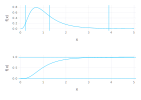

In [69]:
pdf_17 = plot([x -> pdf(FDist(n_P_18-1,n_E_18-1), x)], 0, 5, Geom.vline, xintercept=[F_18, L_R_18, L_L_18])
cdf_17 = plot([x -> cdf(FDist(n_P_18-1,n_E_18-1), x)], 0, 5, Geom.hline, yintercept=[α_18/2, 1-α_18/2])
vstack(pdf_17, cdf_17)

_Decision rule:_ Reject $ H_O $ if $F < L_L \vee F > L_R$.

In [72]:
(F_18 < L_L_18) | (F_18 > L_R_18)

false

<br>